## Name: Ken Jin Chan
## Student ID: 45689768
## Portfolio url: https://github.com/MQCOMP2200-S2-2020/portfolio-2020-Ken-Jin05

In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import matplotlib.dates as mdates
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [2]:
train = pd.read_csv('data/training.csv')
test = pd.read_csv('data/testing.csv')
print(train.shape)
print(test.shape)

(14803, 32)
(4932, 32)


In [3]:
train_date_datetimeindex = pd.read_csv('data/training.csv',
                   parse_dates=['date'],
                    index_col=['date'])
print(train_date_datetimeindex.shape)

(14803, 31)


# Appliances usage over whole period

In [19]:
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')

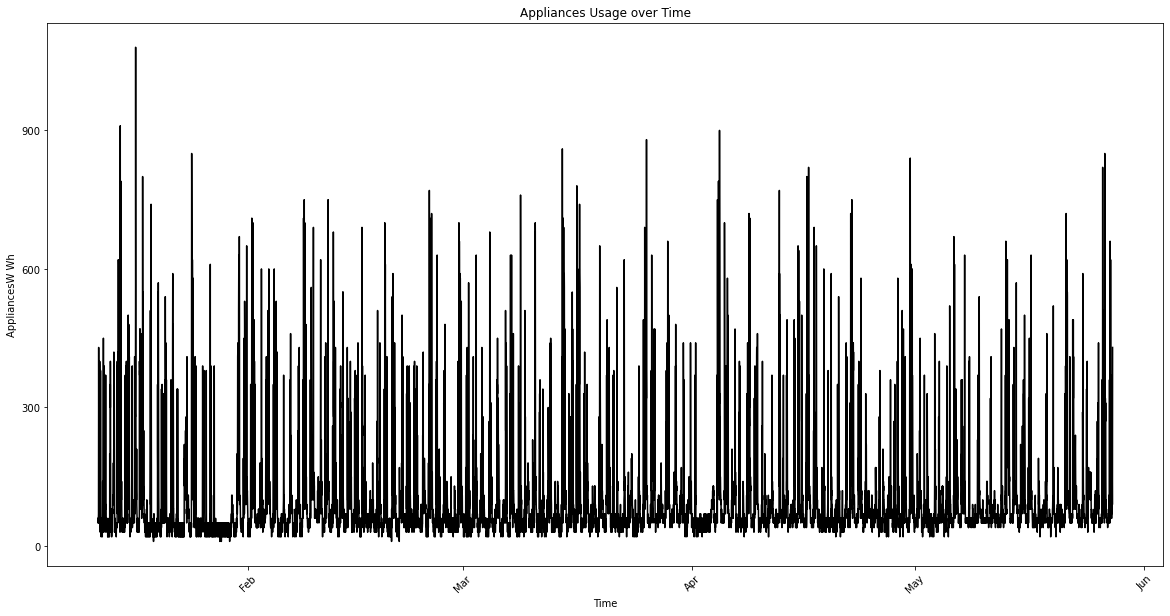

In [20]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(train_date_datetimeindex.index.values, train['Appliances'], color = 'k')

x = plt.gca().xaxis
x.set_major_locator(locator)
x.set_major_formatter(fmt)
ax.yaxis.set_major_locator(plt.MaxNLocator(4))

ax.set(xlabel='Time', ylabel='AppliancesW Wh', title='Appliances Usage over Time')
plt.setp(ax.get_xticklabels(), rotation=45)
ax.grid(False)
plt.show()

Comments: There doesn't seem to be a trend in the appliances usage over time. We can conclude that the appliances usage would be random at any given time.

# Appliances usage over first week of data

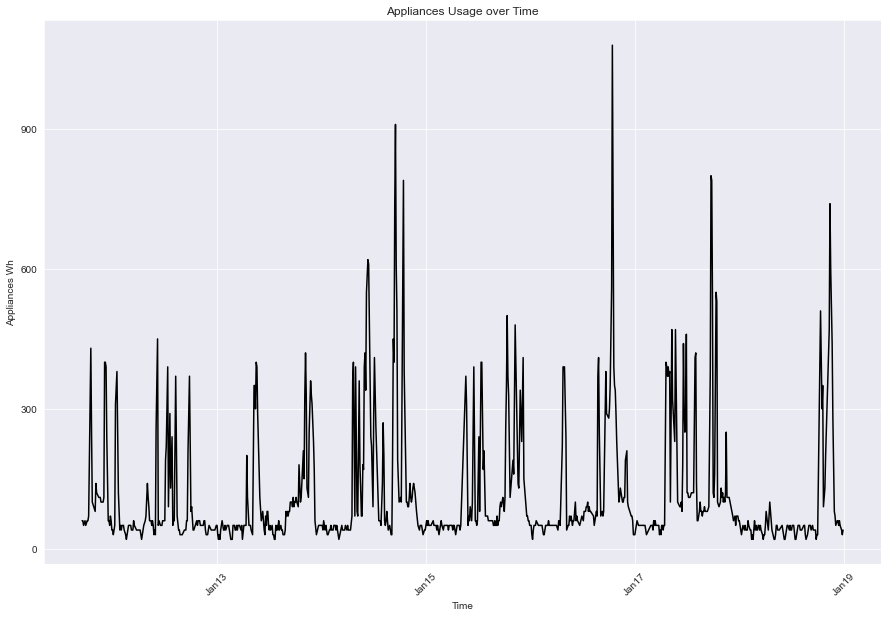

In [21]:
range = train_date_datetimeindex['1/11/2016':'1/18/2016']

sns.set_style('dark')
date_locator = mdates.DayLocator(interval = 2)
date_fmt = mdates.DateFormatter('%b%d')

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(range.index.values, range['Appliances'], color ='k')

x = plt.gca().xaxis
x.set_major_locator(date_locator)
x.set_major_formatter(date_fmt)
ax.yaxis.set_major_locator(plt.MaxNLocator(4))

ax.set(xlabel='Time', ylabel='Appliances Wh', title='Appliances Usage over Time')
plt.setp(ax.get_xticklabels(), rotation=45)
ax.grid()

plt.show()

Comments: We can see that the usage goes up and down which could be due to less applainces being used when everyone is sleeping at night and more usage when everyone is awake.

Text(0, 0.5, 'Frequency')

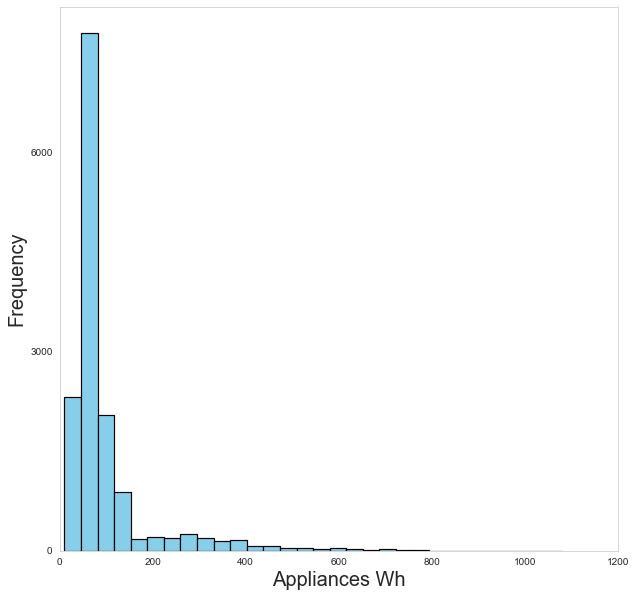

In [22]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(train['Appliances'], bins = 30, color = 'skyblue', edgecolor='black', linewidth=1.2)
ax.grid(False)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_xlim(0,1200)
ax.set_xlabel('Appliances Wh', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)

Comments: We can see that appliances is strongly right skewed. Most of the appliances used around 100 Wh.

(0.0, 1200.0)

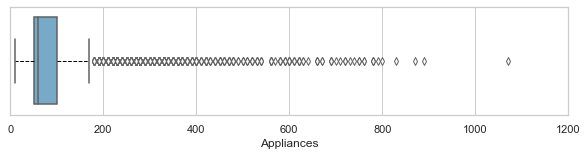

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,2))
sns.boxplot(x='Appliances', data=test, orient="h", palette = 'Blues', whiskerprops = dict(linestyle='--',linewidth=1.0
, color='black'),flierprops = dict(markerfacecolor = '1', markersize = 5))
plt.xlim(0,1200)

Appliances have a mean of around less than 100. There are quite a number of outliers present. Its range is mainly 0-180ish.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


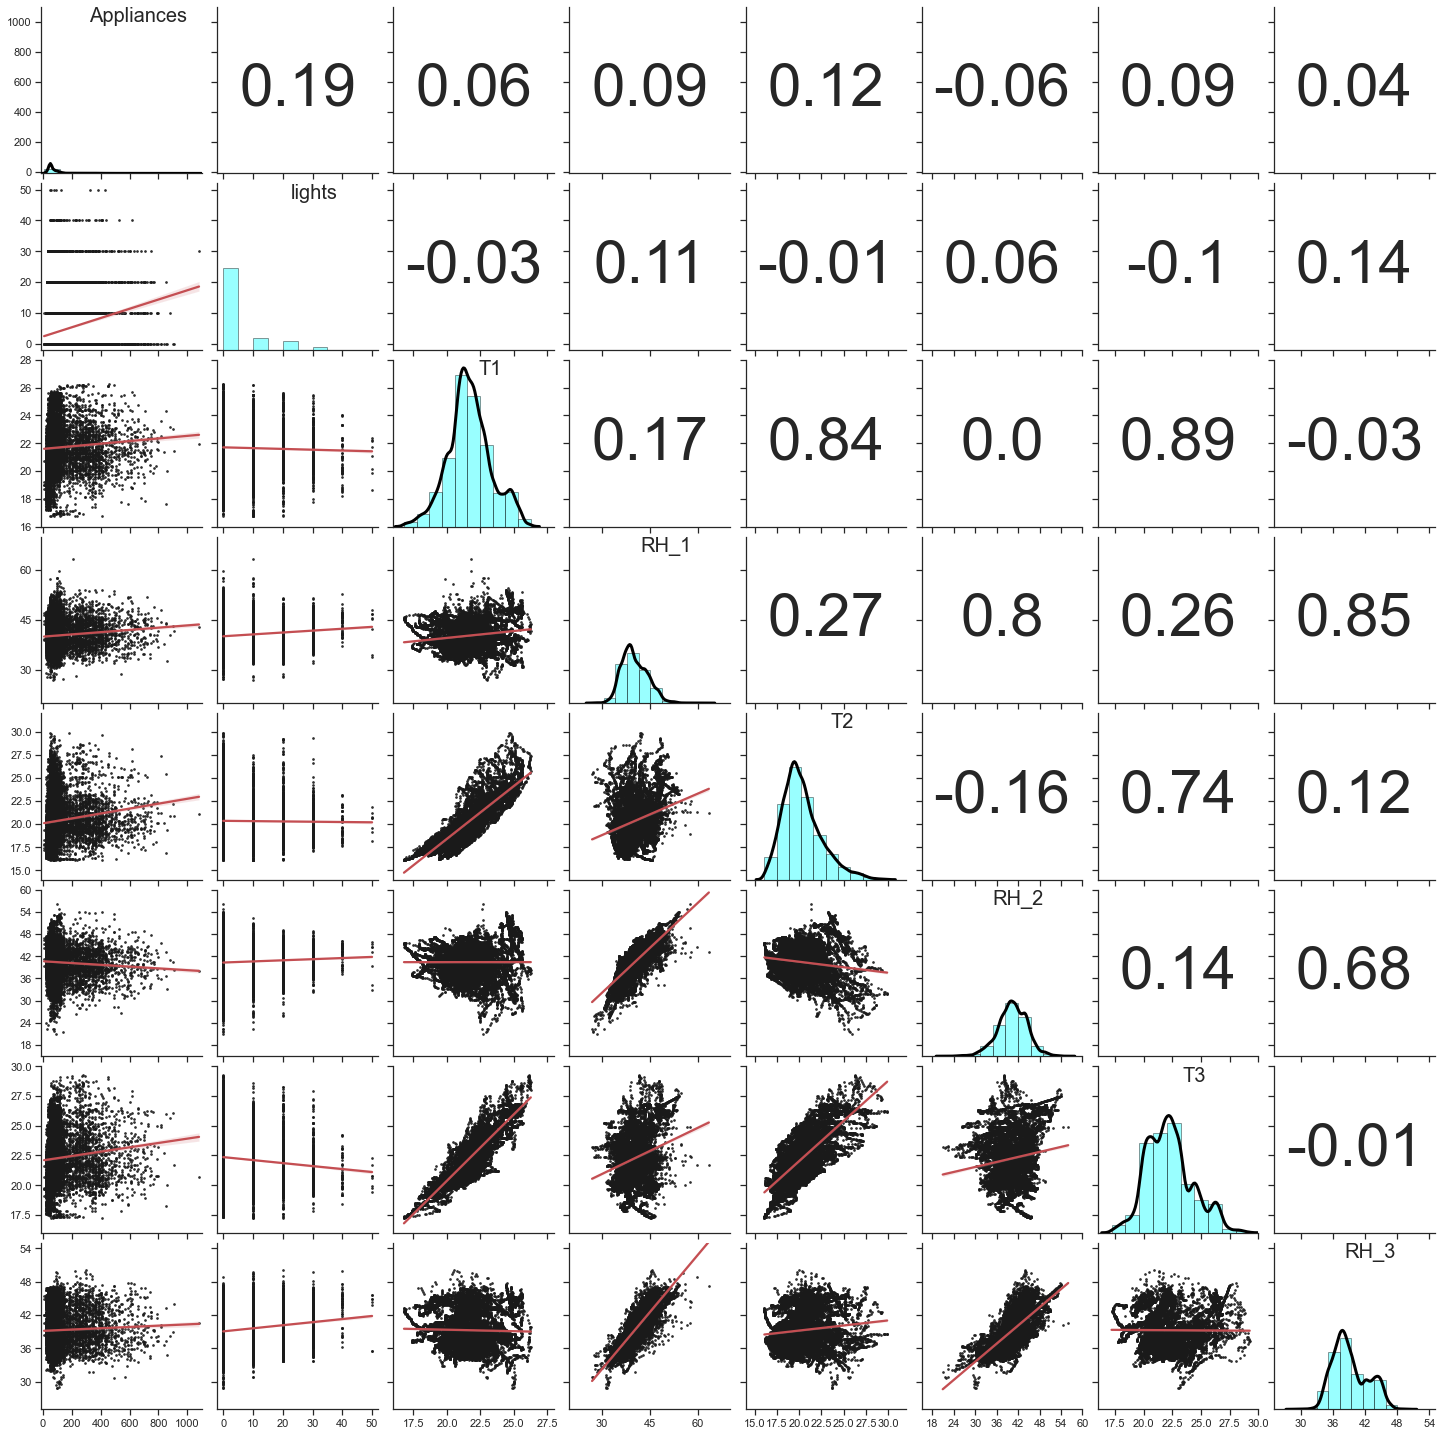

In [24]:
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 60)

data1 = train[['Appliances', 'lights', 'T1', 'RH_1', 'T2','RH_2', 'T3', 'RH_3']]

sns.set_style('ticks')
plot1 = sns.PairGrid(data1)
plot1 = plot1.map_diag(sns.distplot, hist=True, kde=True, bins=10, color='black',
                       hist_kws={'edgecolor':'black','color':'cyan','linewidth':1}, kde_kws={'linewidth':3})
plot1 = plot1.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
plot1 = plot1.map_upper(disp_pearson, fontsize=20)

# Display variable names in diagonal column
for ax, col in zip(np.diag(plot1.axes), data1.columns):
    ax.annotate(col, xy=(0.6, 1), xycoords=ax.transAxes,fontsize=20, va='top', ha='center')
       
# Remove x and y labels
for ax in plot1.axes.flatten():
                   ax.set_xlabel('')
                   ax.set_ylabel('')
            
# Range
plot1.axes[0,0].set_xlim(-10, 1100)
plot1.axes[0,0].set_ylim(-10, 1100)
plot1.axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[0,0].yaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[1,1].set_xlim(-2, 52)
plot1.axes[1,1].set_ylim(-2, 52)
plot1.axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[1,1].yaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[2,2].set_xlim(16, 28)
plot1.axes[2,2].set_ylim(16, 28)
plot1.axes[2,2].xaxis.set_major_locator(plt.MaxNLocator(5))
plot1.axes[2,2].xaxis.set_major_locator(plt.MaxNLocator(5))
plot1.axes[3,3].set_xlim(20, 70)
plot1.axes[3,3].set_ylim(20, 70)
plot1.axes[3,3].xaxis.set_major_locator(plt.MaxNLocator(4))
plot1.axes[3,3].yaxis.set_major_locator(plt.MaxNLocator(4))
plot1.axes[4,4].set_xlim(14, 32)
plot1.axes[4,4].set_ylim(14, 32)
plot1.axes[4,4].xaxis.set_major_locator(plt.MaxNLocator(8))
plot1.axes[4,4].yaxis.set_major_locator(plt.MaxNLocator(8))
plot1.axes[5,5].set_xlim(15, 60)
plot1.axes[5,5].set_ylim(15, 60)
plot1.axes[5,5].xaxis.set_major_locator(plt.MaxNLocator(8))
plot1.axes[5,5].yaxis.set_major_locator(plt.MaxNLocator(8))
plot1.axes[6,6].set_xlim(16, 30)
plot1.axes[6,6].set_ylim(16, 30)
plot1.axes[6,6].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[6,6].yaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[7,7].set_xlim(25, 55)
plot1.axes[7,7].set_ylim(25, 55)
plot1.axes[7,7].xaxis.set_major_locator(plt.MaxNLocator(5))
plot1.axes[7,7].yaxis.set_major_locator(plt.MaxNLocator(5))


## Histogram comments
- Histogram of appliances is right skewed.
- Histogram of T1 is decently symetrical.
- Histogram of RH_1 is decently symetrical.
- Histogram of T2 is right skewed.
- Histogram of RH_2 is decently symetrical.
- Histogram of T3 is right skewed.
- Histogram of RH_3 is right skewed.

## Interesting correlations
- T1 and T2 are positively correlated.
- T1 and T3 are positively correlated.
- RH_1 and RH_2 are positively correlated.
- RH_1 and RH_3 are positively correlated.
- T2 and T3 are positively correlated.
- RH_2 and RH_3 are positively correlated.

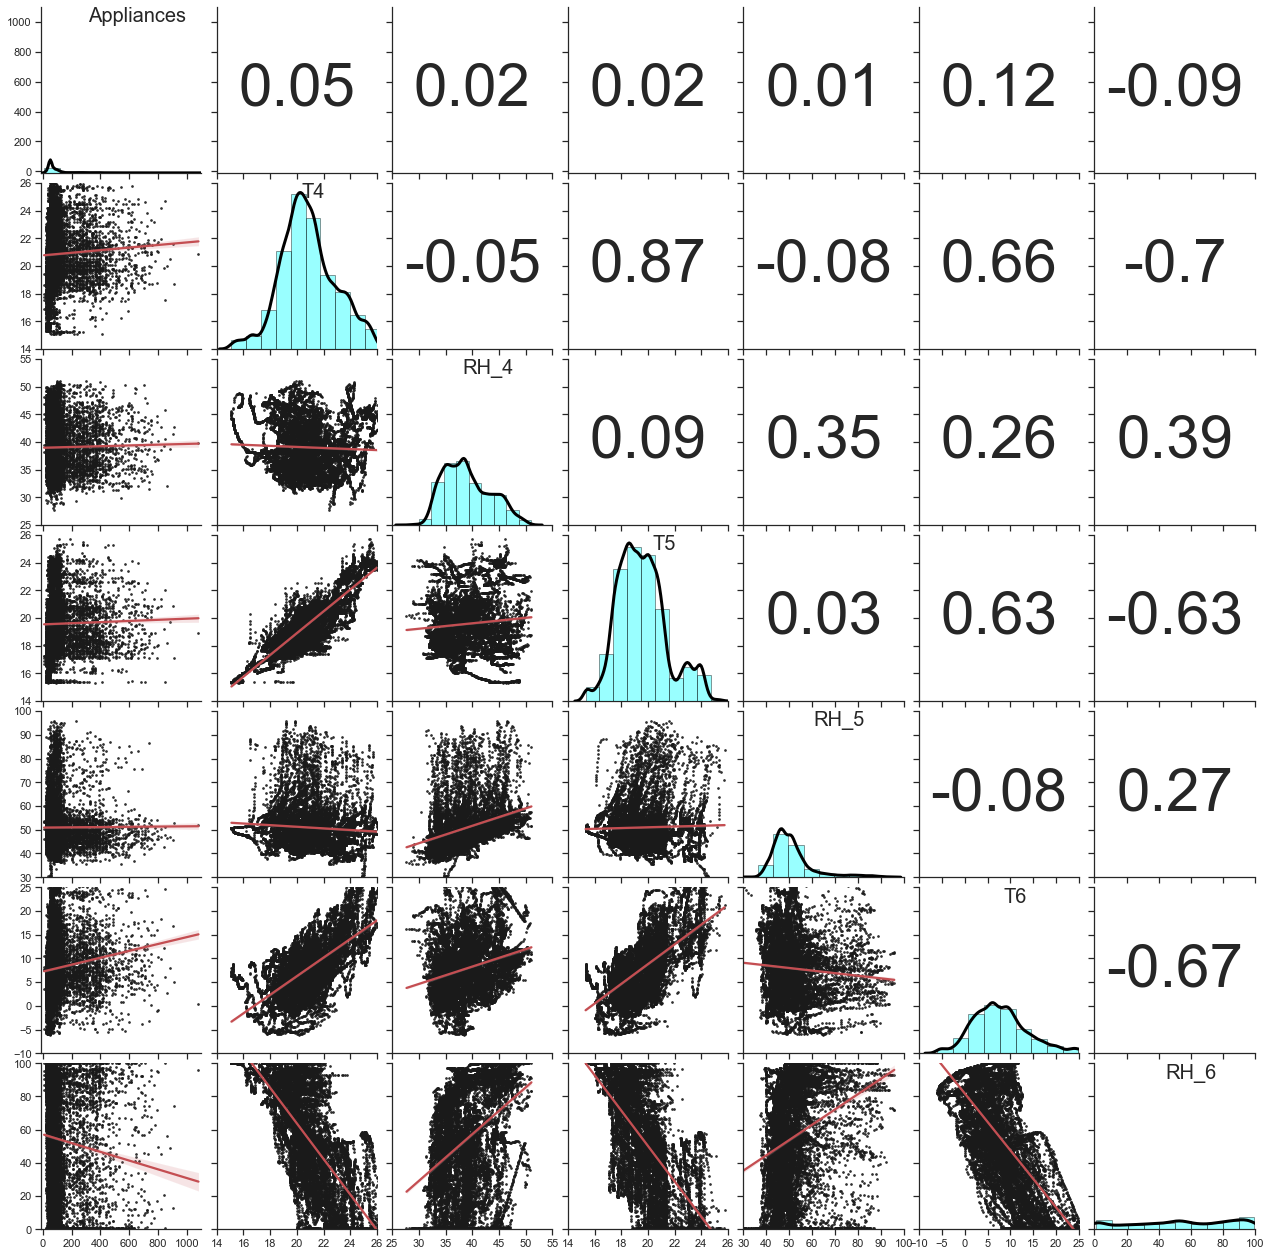

In [25]:
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 60)

data1 = train[['Appliances','T4', 'RH_4', 'T5','RH_5', 'T6', 'RH_6']]

sns.set_style('ticks')
plot1 = sns.PairGrid(data1)
plot1 = plot1.map_diag(sns.distplot, hist=True, kde=True, bins=10, color='black',
                       hist_kws={'edgecolor':'black','color':'cyan','linewidth':1}, kde_kws={'linewidth':3})
plot1 = plot1.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
plot1 = plot1.map_upper(disp_pearson, fontsize=20)

# Display variable names in diagonal column
for ax, col in zip(np.diag(plot1.axes), data1.columns):
    ax.annotate(col, xy=(0.6, 1), xycoords=ax.transAxes,fontsize=20, va='top', ha='center')
       
# Remove x and y labels
for ax in plot1.axes.flatten():
                   ax.set_xlabel('')
                   ax.set_ylabel('')
            
# Range
plot1.axes[0,0].set_xlim(-10, 1100)
plot1.axes[0,0].set_ylim(-10, 1100)
plot1.axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[0,0].yaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[1,1].set_xlim(14, 26)
plot1.axes[1,1].set_ylim(14, 26)
plot1.axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[1,1].yaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[2,2].set_xlim(25, 55)
plot1.axes[2,2].set_ylim(25, 55)
plot1.axes[2,2].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[2,2].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[3,3].set_xlim(14, 26)
plot1.axes[3,3].set_ylim(14, 26)
plot1.axes[3,3].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[3,3].yaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[4,4].set_xlim(30, 100)
plot1.axes[4,4].set_ylim(30, 100)
plot1.axes[4,4].xaxis.set_major_locator(plt.MaxNLocator(7))
plot1.axes[4,4].yaxis.set_major_locator(plt.MaxNLocator(7))
plot1.axes[5,5].set_xlim(-10, 25)
plot1.axes[5,5].set_ylim(-10, 25)
plot1.axes[5,5].xaxis.set_major_locator(plt.MaxNLocator(7))
plot1.axes[5,5].yaxis.set_major_locator(plt.MaxNLocator(7))
plot1.axes[6,6].set_xlim(0, 100)
plot1.axes[6,6].set_ylim(0, 100)
plot1.axes[6,6].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[6,6].yaxis.set_major_locator(plt.MaxNLocator(6))

## Histogram comments
- Histogram of appliances is right skewed.
- Histogram of T4 is decently symetrical.
- Histogram of RH_4 is decently symetrical.
- Histogram of T5 is decently symetrical.
- Histogram of RH_5 is right skewed.
- Histogram of T6 is decently symetrical.
- Histogram of RH_3 is equal throughout.

## Interesting correlations
- T4 and T5 are positively correlated.
- T4 and T6 are positively correlated.
- T5 and T6 are positively correlated.
- T5 and RH_6 are negatively correlated.
- T6 and RH_6 are negatively correlated.


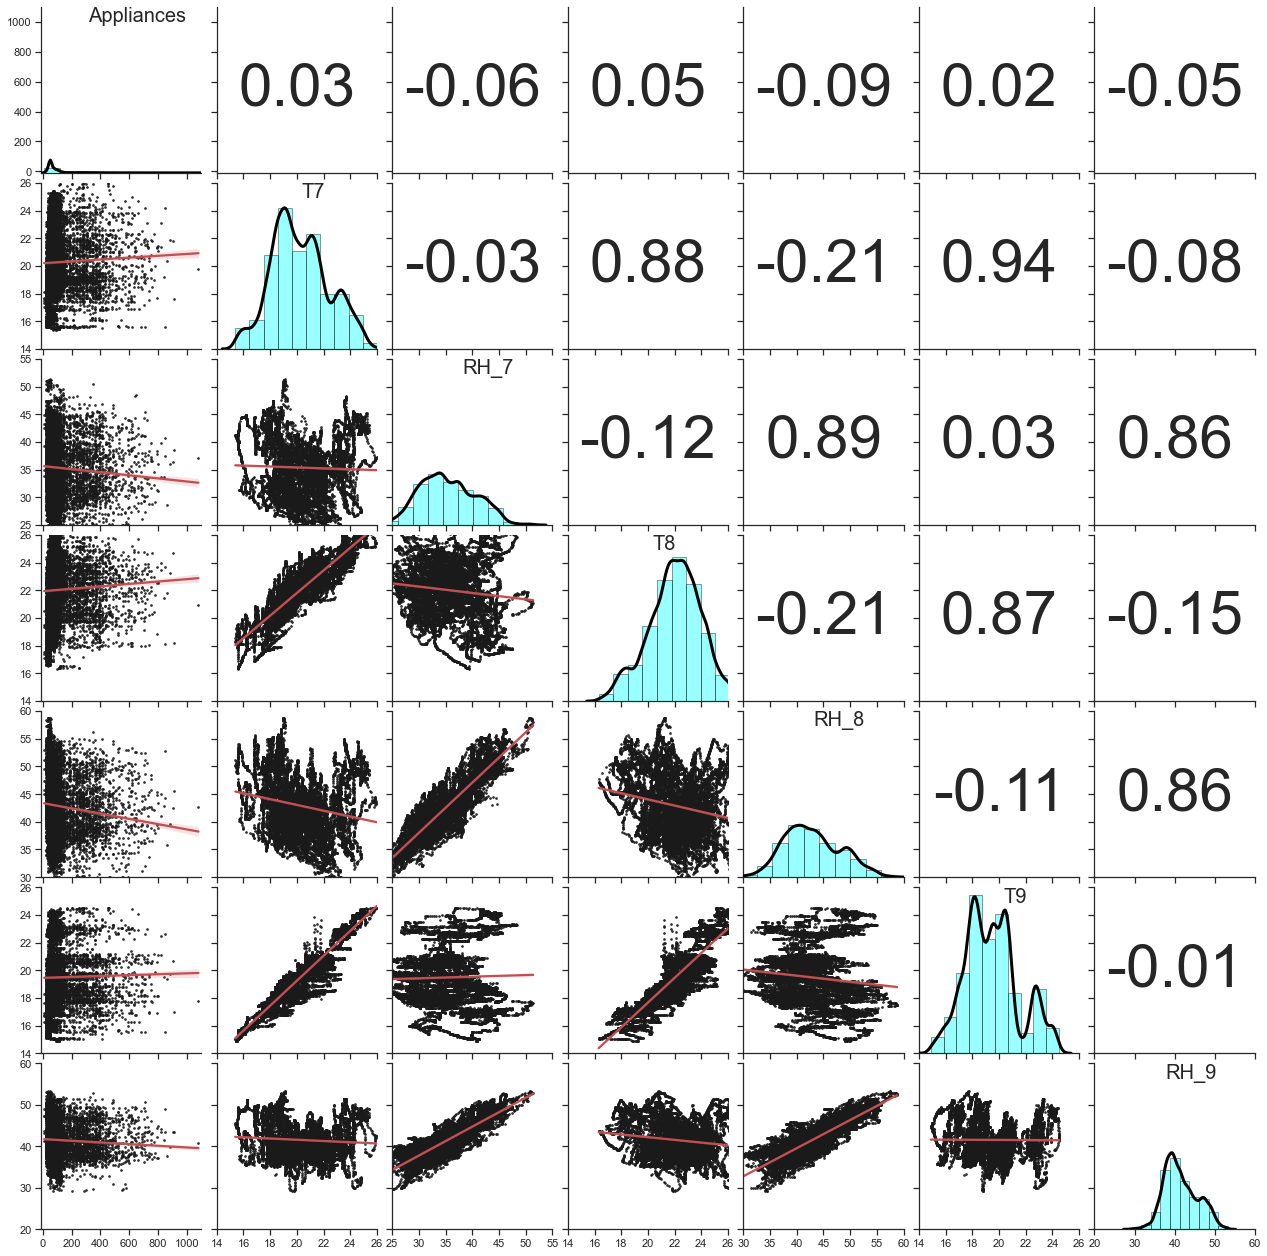

In [26]:
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 60)

data1 = train[['Appliances', 'T7', 'RH_7', 'T8','RH_8', 'T9', 'RH_9']]

sns.set_style('ticks')
plot1 = sns.PairGrid(data1)
plot1 = plot1.map_diag(sns.distplot, hist=True, kde=True, bins=10, color='black',
                       hist_kws={'edgecolor':'black','color':'cyan','linewidth':1}, kde_kws={'linewidth':3})
plot1 = plot1.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
plot1 = plot1.map_upper(disp_pearson, fontsize=20)

# Display variable names in diagonal column
for ax, col in zip(np.diag(plot1.axes), data1.columns):
    ax.annotate(col, xy=(0.6, 1), xycoords=ax.transAxes,fontsize=20, va='top', ha='center')
       
# Remove x and y labels
for ax in plot1.axes.flatten():
                   ax.set_xlabel('')
                   ax.set_ylabel('')
            
# Range
plot1.axes[0,0].set_xlim(-10, 1100)
plot1.axes[0,0].set_ylim(-10, 1100)
plot1.axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[0,0].yaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[1,1].set_xlim(14, 26)
plot1.axes[1,1].set_ylim(14, 26)
plot1.axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[1,1].yaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[2,2].set_xlim(25, 55)
plot1.axes[2,2].set_ylim(25, 55)
plot1.axes[2,2].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[2,2].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[3,3].set_xlim(14, 26)
plot1.axes[3,3].set_ylim(14, 26)
plot1.axes[3,3].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[3,3].yaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[4,4].set_xlim(30, 60)
plot1.axes[4,4].set_ylim(30, 60)
plot1.axes[4,4].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[4,4].yaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[5,5].set_xlim(14, 26)
plot1.axes[5,5].set_ylim(14, 26)
plot1.axes[5,5].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[5,5].yaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[6,6].set_xlim(20, 60)
plot1.axes[6,6].set_ylim(20, 60)
plot1.axes[6,6].xaxis.set_major_locator(plt.MaxNLocator(4))
plot1.axes[6,6].yaxis.set_major_locator(plt.MaxNLocator(4))

## Histogram comments
- Histogram of appliances is right skewed.
- Histogram of T7 is decently symetrical.
- Histogram of RH_7 is  right skewed.
- Histogram of T8 is left skewed
- Histogram of RH_8 is right skewed.
- Histogram of T9 cant be explained.
- Histogram of RH_9 is right skewed.

## Interesting correlations
- T7 and T8 are positively correlated.
- T7 and T9 are positively correlated.
- RH_7 and RH_8 are positively correlated.
- RH_7 and RH_9 are positively correlated.
- T8 and T9 are positively correlated.
- RH_8 and RH_9 are positively correlated.


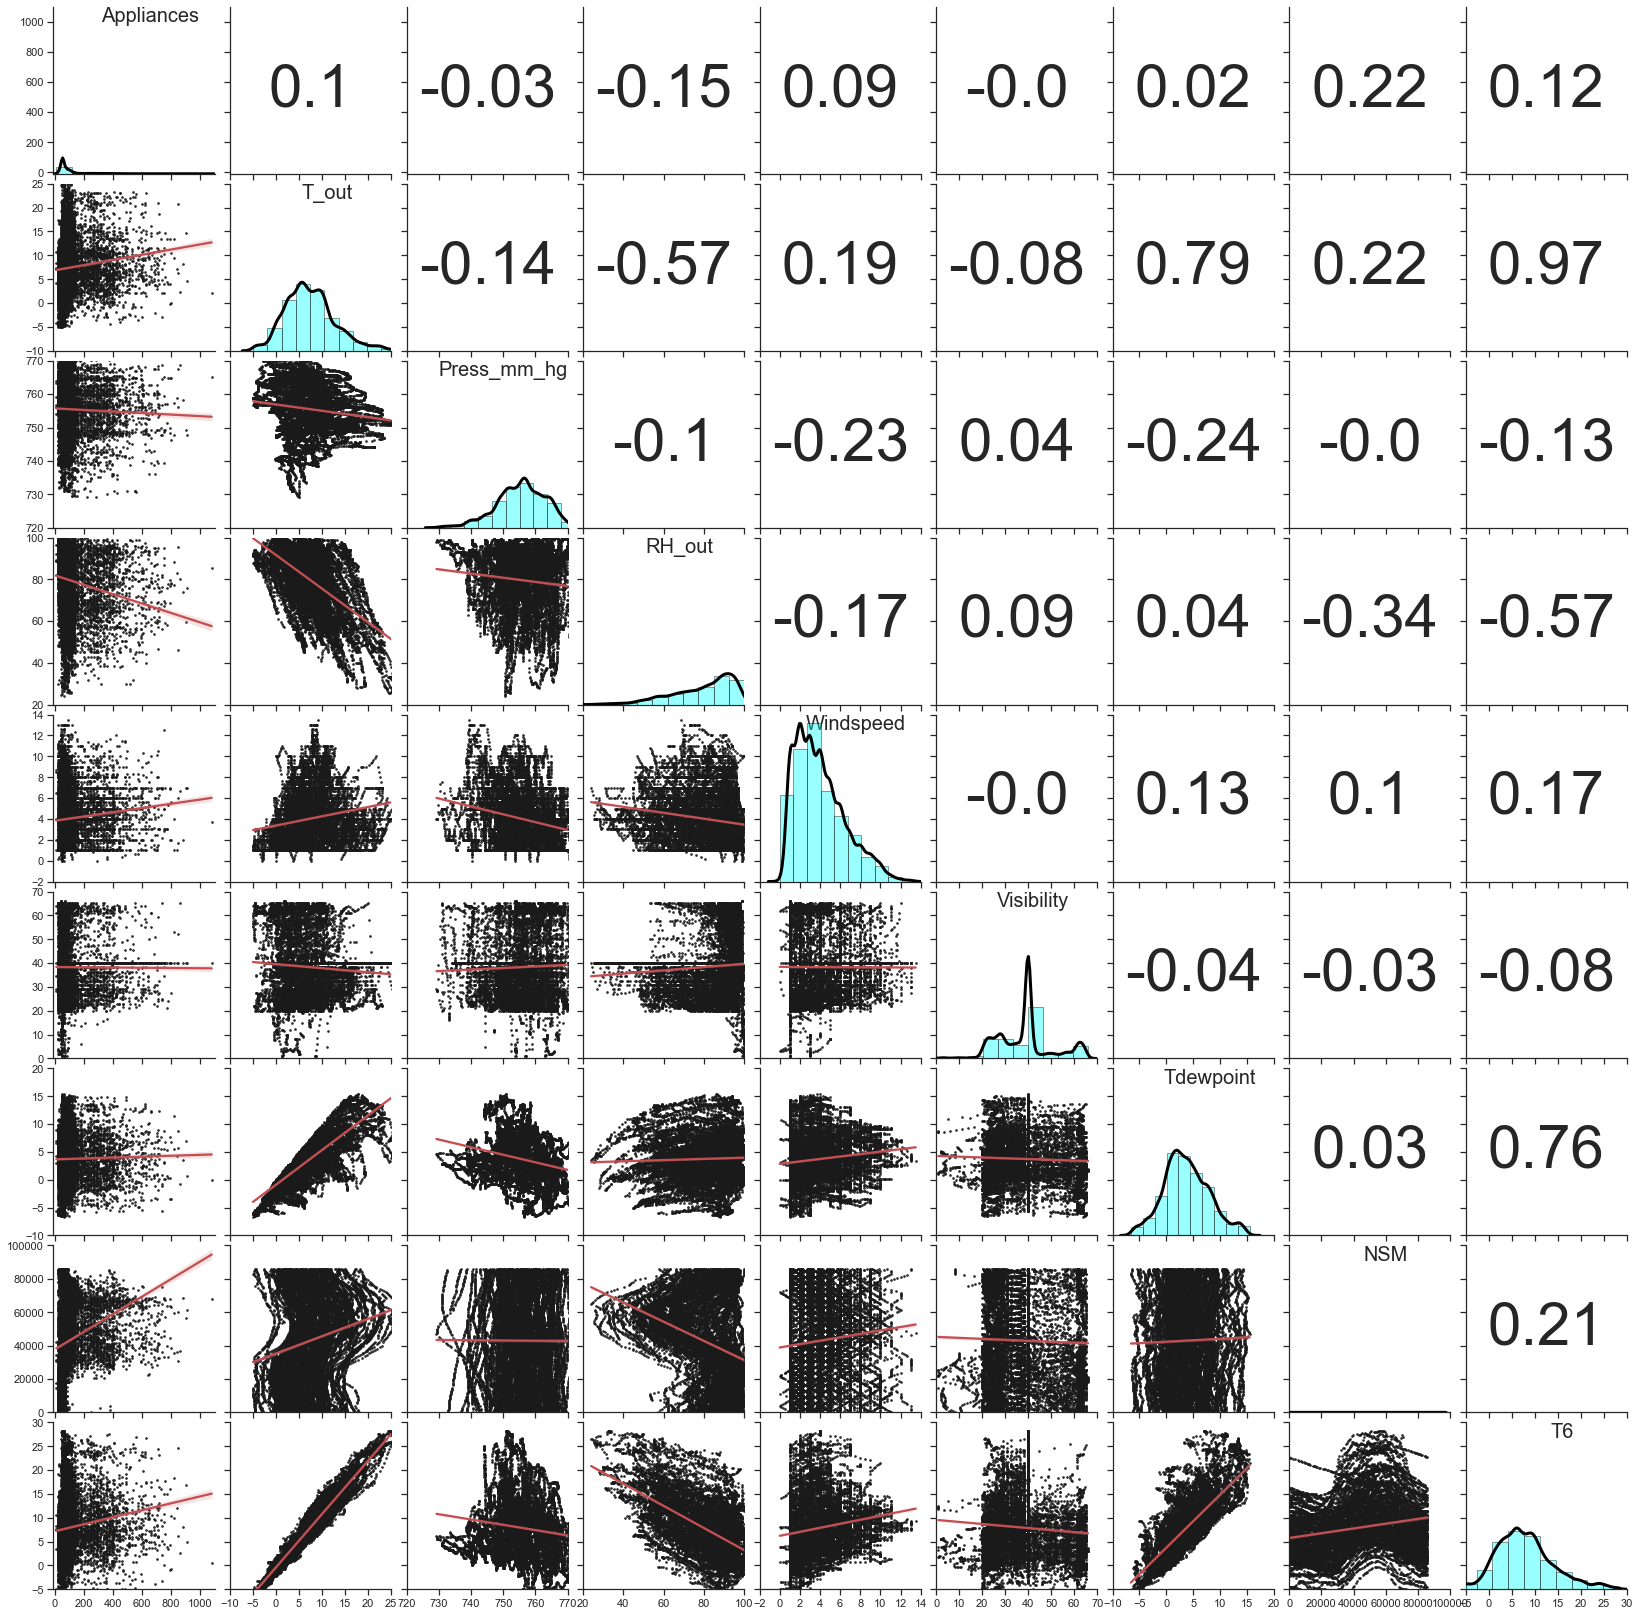

In [27]:
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 60)

data1 = train[['Appliances','T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'NSM', 'T6']]

sns.set_style('ticks')
plot1 = sns.PairGrid(data1)
plot1 = plot1.map_diag(sns.distplot, hist=True, kde=True, bins=10, color='black',
                       hist_kws={'edgecolor':'black','color':'cyan','linewidth':1}, kde_kws={'linewidth':3})
plot1 = plot1.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
plot1 = plot1.map_upper(disp_pearson, fontsize=20)

# Display variable names in diagonal column
for ax, col in zip(np.diag(plot1.axes), data1.columns):
    ax.annotate(col, xy=(0.6, 1), xycoords=ax.transAxes,fontsize=20, va='top', ha='center')
       
# Remove x and y labels
for ax in plot1.axes.flatten():
                   ax.set_xlabel('')
                   ax.set_ylabel('')
            
# Range
plot1.axes[0,0].set_xlim(-10, 1100)
plot1.axes[0,0].set_ylim(-10, 1100)
plot1.axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[0,0].yaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[1,1].set_xlim(-10, 25)
plot1.axes[1,1].set_ylim(-10, 25)
plot1.axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(7))
plot1.axes[1,1].yaxis.set_major_locator(plt.MaxNLocator(7))
plot1.axes[2,2].set_xlim(720, 770)
plot1.axes[2,2].set_ylim(720, 770)
plot1.axes[2,2].xaxis.set_major_locator(plt.MaxNLocator(5))
plot1.axes[2,2].xaxis.set_major_locator(plt.MaxNLocator(5))
plot1.axes[3,3].set_xlim(20, 100)
plot1.axes[3,3].set_ylim(20, 100)
plot1.axes[3,3].xaxis.set_major_locator(plt.MaxNLocator(4))
plot1.axes[3,3].yaxis.set_major_locator(plt.MaxNLocator(4))
plot1.axes[4,4].set_xlim(-2, 14)
plot1.axes[4,4].set_ylim(-2, 14)
plot1.axes[4,4].xaxis.set_major_locator(plt.MaxNLocator(8))
plot1.axes[4,4].yaxis.set_major_locator(plt.MaxNLocator(8))
plot1.axes[5,5].set_xlim(0, 70)
plot1.axes[5,5].set_ylim(0, 70)
plot1.axes[5,5].xaxis.set_major_locator(plt.MaxNLocator(7))
plot1.axes[5,5].yaxis.set_major_locator(plt.MaxNLocator(7))
plot1.axes[6,6].set_xlim(-10, 20)
plot1.axes[6,6].set_ylim(-10, 20)
plot1.axes[6,6].xaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[6,6].yaxis.set_major_locator(plt.MaxNLocator(6))
plot1.axes[7,7].set_xlim(0, 100000)
plot1.axes[7,7].set_ylim(0, 100000)
plot1.axes[7,7].xaxis.set_major_locator(plt.MaxNLocator(5))
plot1.axes[7,7].yaxis.set_major_locator(plt.MaxNLocator(5))
plot1.axes[8,8].set_xlim(-5, 30)
plot1.axes[8,8].set_ylim(-5, 30)
plot1.axes[8,8].xaxis.set_major_locator(plt.MaxNLocator(7))
plot1.axes[8,8].yaxis.set_major_locator(plt.MaxNLocator(7))

## Histogram comments
- Histogram of appliances is right skewed.
- Histogram of T_out is decently symetrical.
- Histogram of Press_mm_hg is  left skewed.
- Histogram of RH_Out is left skewed
- Histogram of Windspeed is right skewed.
- Histogram of Visibility cant be explained.
- Histogram of Tdewpoint is decently symetrical.
- Histogram of NSM is not visible(**not sure why sorry**)
- Histogram of T6 is slightly right skewed

## Interesting correlations
- T_out and RH_Out are negatively correlated.
- T_out and Tdewpoint are positively correlated.
- T_out and T6 are positively correlated.
- RH_out and T6 are negatively correlated.
- Tdewpoint and T6 are positively correlated.

In [28]:
def process_datetime(dt):
    '''a simple function to parse string time into several components'''
    dt = datetime.strptime(dt, '%Y-%m-%d %H:%M:%S')
    return [dt.weekday(), dt.hour]

In [29]:
colnames = train.columns

In [30]:
new_train = train.merge(train.date.apply(lambda x: pd.Series(process_datetime(x))), left_index = True, right_index = True)
new_train.columns = colnames.tolist() + ['day_of_week', 'hour_of_day']

In [31]:
new_train = new_train.set_index(pd.DatetimeIndex(new_train['date']))

In [32]:
heat_week1 = new_train['1/11/2016':'1/17/2016']

heatmap1 = heat_week1[['day_of_week','hour_of_day', 'Appliances']].groupby(['hour_of_day','day_of_week']).sum()
map1 = heatmap1.unstack()
map1 = map1.sort_values(by=['hour_of_day'], ascending = False)
map1 = map1.fillna(0)
map1

Appliances                                               
day_of_week          0      1       2       3       4       5       6
hour_of_day                                                          
23               340.0  210.0   100.0   200.0   310.0   260.0   320.0
22              1540.0  130.0   760.0   190.0   790.0   400.0   130.0
21               520.0  250.0  1360.0   570.0   610.0   720.0   470.0
20               450.0  260.0  1360.0   660.0   830.0   340.0   660.0
19               870.0  220.0   560.0   670.0   440.0  2350.0   420.0
18               190.0  250.0   580.0  1000.0  1670.0  2570.0  1470.0
17               280.0  930.0   490.0  2320.0   590.0   670.0  2600.0
16                 0.0  150.0   480.0  1850.0   340.0   300.0   330.0
15                 0.0  170.0   250.0   210.0   280.0  1180.0   490.0
14                 0.0  560.0   230.0   780.0   250.0   180.0   760.0
13                 0.0  710.0   210.0   170.0   450.0   520.0   650.0
12                 0.0  950.0   210.0   960.0  1120.0   390.0   460.0
11                 0.0  330.0   360.0  1040.0   620.0   120.0  1910.0
10                 0.0  820.0   310.0  2540.0   310.0   350.0   360.0
9                  0.0  260.0  1190.0  1010.0   800.0   310.0  1060.0
8                  0.0  520.0  1210.0   690.0    50.0   380.0  1270.0
7                  0.0  220.0   330.0  1290.0   140.0  1000.0  1920.0
6                  0.0  120.0   350.0   210.0   220.0   260.0   270.0
5                  0.0  170.0   210.0   130.0   240.0    50.0   220.0
4                  0.0  230.0   270.0   110.0   240.0   210.0   310.0
3                  0.0  140.0   190.0   180.0   180.0   200.0    50.0
2                  0.0  180.0   180.0   260.0   280.0   150.0   120.0
1                  0.0  590.0   190.0   190.0   210.0   210.0   250.0
0                  0.0  470.0   190.0   190.0   320.0   240.0   180.0

[Text(0.5, 0, 'Mon'),
 Text(1.5, 0, 'Tue'),
 Text(2.5, 0, 'Wed'),
 Text(3.5, 0, 'Thu'),
 Text(4.5, 0, 'Fri'),
 Text(5.5, 0, 'Sat'),
 Text(6.5, 0, 'Sun')]

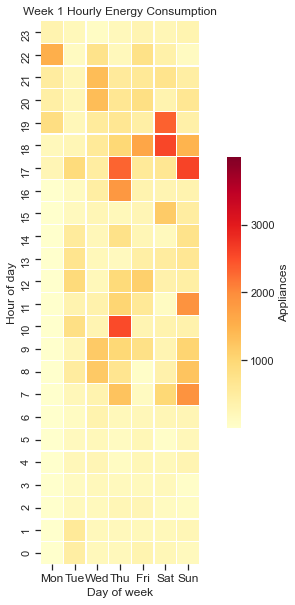

In [33]:
plt.subplots(figsize=(10,10))
cbar_kws = {"ticks":[1000, 2000, 3000],"shrink": .5, 'label': 'Appliances'}
heat1 = sns.heatmap(map1, linewidths = 0.2, cmap = "YlOrRd", vmin=0, vmax=4000, cbar_kws=cbar_kws, square=True)
heat1.set_title('Week 1 Hourly Energy Consumption')
heat1.set_xlabel('Day of week')
heat1.set_ylabel('Hour of day')
heat1.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize = 12, rotation = 0)

## Comments
We can see that from 23:00 to 6:00, the Appliances usage are very low. This could be derived from people sleeping at that time.
On Saturday and Sunday, we can see that there is quite a high amount of usage which could be caused by people being at home during the weekends.

In [34]:
heat_week2 = new_train['1/18/2016':'1/24/2016']

heatmap2 = heat_week2[['day_of_week','hour_of_day', 'Appliances']].groupby(['hour_of_day','day_of_week']).sum()
map2 = heatmap2.unstack()
map2 = map2.sort_values(by=['hour_of_day'], ascending = False)
map2

Appliances                                  
day_of_week          0     1     2     3    4    5     6
hour_of_day                                             
23                 220   280   210   140  190  300   230
22                 290   180   850   290  230  390   690
21                1400   710  1070   860  160  500   400
20                1210  1770  1150  1240  180  530   260
19                1070  2120  1980  1060  140  320   630
18                 540   560   430   790  130  550   270
17                 130   350  1050   170  220  930   350
16                 240   130   360   170  100  250   300
15                 130   160   320   180  220  610   340
14                 170   140   260   250  130  750   800
13                 210   180   370   810  230  260  2410
12                 160   180   730   150  160  830  1240
11                 230   140   490   250  540  530   970
10                 150   170   320   330  120  670  1920
9                   90   160   240   150  510  660  1990
8                  210   250   540   170  260  570  1800
7                  140   200   230   280  270  180   430
6                  240   240   700   160  190  130   210
5                  150   230   120   310  100  220   190
4                  270   150   200   240  130   60   150
3                  200   280   210   300  240  190   270
2                  210   150   190   180  200  170   190
1                  210   270   190   270  170  140   260
0                  270   280   190   200  120  170   130

[Text(0.5, 0, 'Mon'),
 Text(1.5, 0, 'Tue'),
 Text(2.5, 0, 'Wed'),
 Text(3.5, 0, 'Thu'),
 Text(4.5, 0, 'Fri'),
 Text(5.5, 0, 'Sat'),
 Text(6.5, 0, 'Sun')]

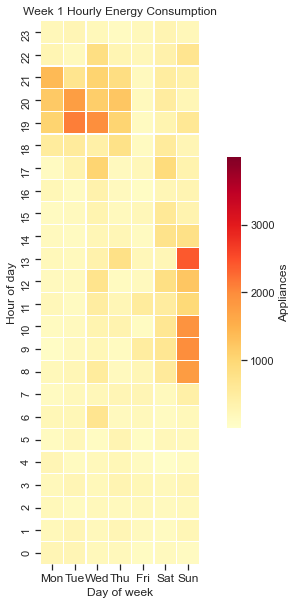

In [35]:
plt.subplots(figsize=(10,10))
cbar_kws = {"ticks":[1000, 2000, 3000],"shrink": .5, 'label': 'Appliances'}
heat2 = sns.heatmap(map2, linewidths = 0.2, cmap = "YlOrRd", vmin=0, vmax=4000, cbar_kws=cbar_kws, square=True)
heat2.set_title('Week 1 Hourly Energy Consumption')
heat2.set_xlabel('Day of week')
heat2.set_ylabel('Hour of day')
heat2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize = 12, rotation = 0)

## Comments
We can see that from 23:00 to 7:00, the Appliances usage are very low. This could be derived from people sleeping at that time.
On Sunday, we can see that there is quite a high amount of usage which could be caused by people being at home during the weekends. Compared to last weeks heatmap, it seems that more people went out on one of the weekend(Saturday).

In [36]:
heat_week3 = new_train['1/25/2016':'1/31/2016']

heatmap3 = heat_week3[['day_of_week','hour_of_day', 'Appliances']].groupby(['hour_of_day','day_of_week']).sum()
map3 = heatmap3.unstack()
map3 = map3.sort_values(by=['hour_of_day'], ascending = False)
map3

Appliances                                 
day_of_week          0     1    2    3    4     5     6
hour_of_day                                            
23                 950   920  150  210  220    80   120
22                 200   500  160  130  210   280   230
21                 390   280  250  150  310   580   410
20                1330  1260  180  110  380   400   500
19                 900   200  150  200  530  1090   630
18                 190   120  200  200  340  1200  1750
17                 190   130  140  180  390  2090   720
16                 150   130  200  260  240   840   680
15                 240   180  170  150  170   970   490
14                 230   180  210  140  220  1450   340
13                 200   150  170  100  180  1540   990
12                 240   130   80  200  120   510  2040
11                 180   140  260  120  120   420   400
10                 240   170  150  150   80    40  1690
9                  170   220  820  130  150   140  1300
8                  140   350  180  100  250   220   510
7                  150   500  200  200  140   120   140
6                  240   200  110  140  260   250   180
5                  200   230  200  170   50   130   190
4                  180   240  210  150  150   160   110
3                   80   170  190  140  180   100   240
2                  200    50  200  210  120   270   140
1                  250   210  140  110  140   110   140
0                  290   770  230  170  130   220   240

[Text(0.5, 0, 'Mon'),
 Text(1.5, 0, 'Tue'),
 Text(2.5, 0, 'Wed'),
 Text(3.5, 0, 'Thu'),
 Text(4.5, 0, 'Fri'),
 Text(5.5, 0, 'Sat'),
 Text(6.5, 0, 'Sun')]

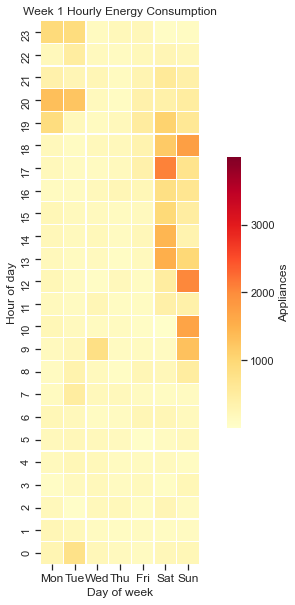

In [37]:
plt.subplots(figsize=(10,10))
cbar_kws = {"ticks":[1000, 2000, 3000],"shrink": .5, 'label': 'Appliances'}
heat3 = sns.heatmap(map3, linewidths = 0.2, cmap = "YlOrRd", vmin=0, vmax=4000, cbar_kws=cbar_kws, square=True)
heat3.set_title('Week 1 Hourly Energy Consumption')
heat3.set_xlabel('Day of week')
heat3.set_ylabel('Hour of day')
heat3.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize = 12, rotation = 0)

## Comments
We can see that from 1:00 to 8:00, the Appliances usage are very low. This shows that the users could be sleeping later and waking up later as well compared to past few weeks. On Saturday and Sunday, we can see that there is quite a high amount of usage which could be caused by people being at home during the weekends.

In [38]:
heat_week4 = new_train['2/1/2016':'2/7/2016']

heatmap4 = heat_week4[['day_of_week','hour_of_day', 'Appliances']].groupby(['hour_of_day','day_of_week']).sum()
map4 = heatmap4.unstack()
map4 = map4.sort_values(by=['hour_of_day'], ascending = False)
map4

Appliances                                   
day_of_week          0     1     2     3    4     5     6
hour_of_day                                              
23                 320   250   260   220  160   330   180
22                 590   390   510   390  340   240   430
21                 530   380   340  1190  370   370  1000
20                 850   380   380   600  360   570   650
19                 350   650   570   910  450   580  1360
18                 880  1370  1400  1080  890   320  1080
17                1030   360  1060   530  230  1120   820
16                 910   260  1300   500  260   370   530
15                2100   310   540   420  190   680   160
14                1400   570   800   450  130   310   120
13                1410   220   390   830  140   250   210
12                1040   350   560  1660  340   320   230
11                1190   290   560   360  150   190   250
10                 360   320  1520   320  160   230   150
9                  640   380   880   660  200   140   120
8                  120   180   560   230  190   180   210
7                  450   270   300   200  190   200   180
6                  180   180   280   150  230   220   150
5                  280   220   300   180   90   180   190
4                  230   220   120   240  210   190   170
3                  240   230   230   150  220   180   260
2                  190   270   330   180  240   270   170
1                  220   260   340   220  230   190   220
0                   90   240   250    90  200   200   230

[Text(0.5, 0, 'Mon'),
 Text(1.5, 0, 'Tue'),
 Text(2.5, 0, 'Wed'),
 Text(3.5, 0, 'Thu'),
 Text(4.5, 0, 'Fri'),
 Text(5.5, 0, 'Sat'),
 Text(6.5, 0, 'Sun')]

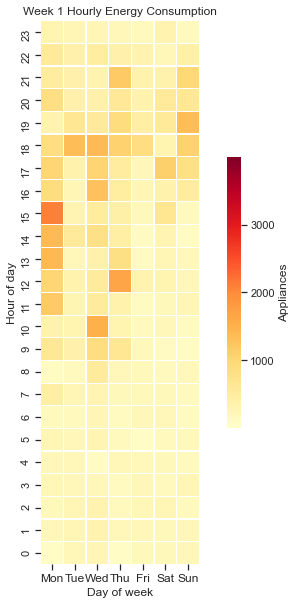

In [39]:
plt.subplots(figsize=(10,10))
cbar_kws = {"ticks":[1000, 2000, 3000],"shrink": .5, 'label': 'Appliances'}
heat4 = sns.heatmap(map4, linewidths = 0.2, cmap = "YlOrRd", vmin=0, vmax=4000, cbar_kws=cbar_kws, square=True)
heat4.set_title('Week 1 Hourly Energy Consumption')
heat4.set_xlabel('Day of week')
heat4.set_ylabel('Hour of day')
heat4.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize = 12, rotation = 0)

## Comments
We can see that from 22:00 to 9:00, the Appliances usage are very low. This shows that the users could be very tired and slept longer than usual. On Saturday and Sunday, we can see that there is quite a low amount of usage compared to previous weeks which could be caused by people bgoing out during the weekends.

## Linear regression

In [4]:
x_train = train.drop(['date', 'Appliances', 'WeekStatus', 'Day_of_week'], axis = 1) # axis = 1 is to drop columns
y_train = train['Appliances']
x_test = test.drop(['date', 'Appliances', 'WeekStatus', 'Day_of_week'], axis = 1) # axis = 1 is to drop columns
y_test = test['Appliances']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14803, 28)
(14803,)
(4932, 28)
(4932,)


In [5]:
# source: https://stackoverflow.com/questions/47648133/mape-calculation-in-python
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [6]:
# linear regression using numerical variables

# instantiating the model
model_1 = LinearRegression()

# model training
model_1.fit(x_train,y_train)

# predicting on training and testing set
y_train_pred = model_1.predict(x_train)
y_test_pred = model_1.predict(x_test)

# calculating metric squares
print("Metric scores on training set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2-score: ", r2_score(y_train, y_train_pred))
print("MAE: ", mean_absolute_error(y_train, y_train_pred))
print("MAPE: ", mean_absolute_percentage_error(y_train, y_train_pred))
print()
print("Metric scores on testing set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2-score: ", r2_score(y_test, y_test_pred))
print("MAE: ", mean_absolute_error(y_test, y_test_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_test_pred))

Metric scores on training set: 
RMSE:  93.57143468503801
R2-score:  0.17188056846730493
MAE:  53.255031292957206
MAPE:  61.49412441844212

Metric scores on testing set: 
RMSE:  93.56425120887656
R2-score:  0.15199183390308568
MAE:  52.075015316595916
MAPE:  60.10475096677105


## Using dummies to convert categorical variables to dummy variables

In [7]:
train_status_df = pd.get_dummies(train['WeekStatus'])
test_status_df = pd.get_dummies(test['WeekStatus'])
train_status_df.head()

,Weekday,Weekend
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [8]:
train_status = train.join(train_status_df)
test_status = test.join(test_status_df)
print(train_status.shape)
print(test_status.shape)

(14803, 34)
(4932, 34)


In [9]:
train_day_df = pd.get_dummies(train['Day_of_week'])
test_day_df = pd.get_dummies(test['Day_of_week'])
train_day_df.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [10]:
train_full = train_status.join(train_day_df)
test_full = test_status.join(test_day_df)
print(train_full.shape)
print(test_full.shape)

(14803, 41)
(4932, 41)


In [11]:
x_train = train_full.drop(['date', 'Appliances', 'WeekStatus', 'Day_of_week'], axis = 1) # axis = 1 is to drop columns
y_train = train_full['Appliances']
x_test = test_full.drop(['date', 'Appliances', 'WeekStatus', 'Day_of_week'], axis = 1) # axis = 1 is to drop columns
y_test = test_full['Appliances']
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14803, 37)
(14803,)
(4932, 37)
(4932,)


In [12]:
# linear regression using all variables

# instantiating the model
model_2 = LinearRegression()
model_2_test = LinearRegression()

# model training
model_2.fit(x_train,y_train)
model_2_test.fit(x_test,y_test)

# predicting on training and testing set
y_train_pred = model_2.predict(x_train)
y_test_pred = model_2.predict(x_test)

# calculating metric squares
print("Metric scores on training set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2-score: ", r2_score(y_train, y_train_pred))
print("MAE: ", mean_absolute_error(y_train, y_train_pred))
print("MAPE: ", mean_absolute_percentage_error(y_train, y_train_pred))
print("Linear model equation: y = x *", model_2.coef_, "+", model_2.intercept_)
print()
print("Metric scores on testing set: ")
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2-score: ", r2_score(y_test, y_test_pred))
print("MAE: ", mean_absolute_error(y_test, y_test_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_test_pred))
print("Linear model equation: y = x *", model_2_test.coef_, "+", model_2_test.intercept_)

Metric scores on training set: 
RMSE:  93.20557248110671
R2-score:  0.17834376492372528
MAE:  53.138912335056055
MAPE:  61.33117488093237
Linear model equation: y = x * [ 1.85553006e+00 -5.91845889e+00  1.45133092e+01 -1.78954033e+01
 -1.38398928e+01  2.63731193e+01  6.28672835e+00  9.33887355e-01
 -4.80870473e-01 -1.47087807e+00  6.67518402e-02  7.06876291e+00
  2.90651133e-01  1.40788640e+00 -1.62361383e+00  8.34064978e+00
 -4.13477104e+00 -1.30318619e+01 -3.83200906e-01 -9.69075418e+00
  1.81137088e-01 -7.80586660e-01  1.78745383e+00  1.87144196e-01
  3.62424965e+00 -2.41190622e-02 -2.41190622e-02  2.88118585e-04
 -3.59824986e+00  3.59824986e+00  1.13578549e+01  5.16267671e+00
  9.95177250e+00 -6.35352264e+00 -5.72784235e+00 -8.94247062e+00
 -5.44846846e+00] + -70.62249686509158

Metric scores on testing set: 
RMSE:  93.17643426587763
R2-score:  0.15900712778675063
MAE:  51.98492960938431
MAPE:  59.95512561148145
Linear model equation: y = x * [ 2.05186196e+00 -1.07863388e-01  1.441

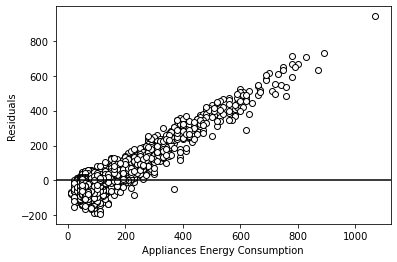

In [13]:
residual = y_test.values-y_test_pred
plt.scatter(y_test, residual, color="white", edgecolor='black')
plt.xlabel('Appliances Energy Consumption')
plt.ylabel('Residuals')
plt.axhline(0, color='black')

Residual and Appliances have a positive linear relationship with a possible outlier at the top right corner.

In [14]:
estimator = LinearRegression()
rmse_scores = []
for i in range(1,15):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(x_train, y_train)
    y_test_pred = selector.predict(x_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE score on test set using", i, "features: ", rmse_test)
    rmse_scores.append(rmse_test)

RMSE score on test set using 1 features:  101.26888895164174
RMSE score on test set using 2 features:  99.12399407311727
RMSE score on test set using 3 features:  98.92249989546323
RMSE score on test set using 4 features:  97.97137950937748
RMSE score on test set using 5 features:  97.87877773888789
RMSE score on test set using 6 features:  97.79879832642703
RMSE score on test set using 7 features:  97.54264516067863
RMSE score on test set using 8 features:  97.4383034495254
RMSE score on test set using 9 features:  96.97841033120521
RMSE score on test set using 10 features:  95.04617607469439
RMSE score on test set using 11 features:  95.02193708768031
RMSE score on test set using 12 features:  94.9073006369462
RMSE score on test set using 13 features:  94.68863860202238
RMSE score on test set using 14 features:  94.70687758710378


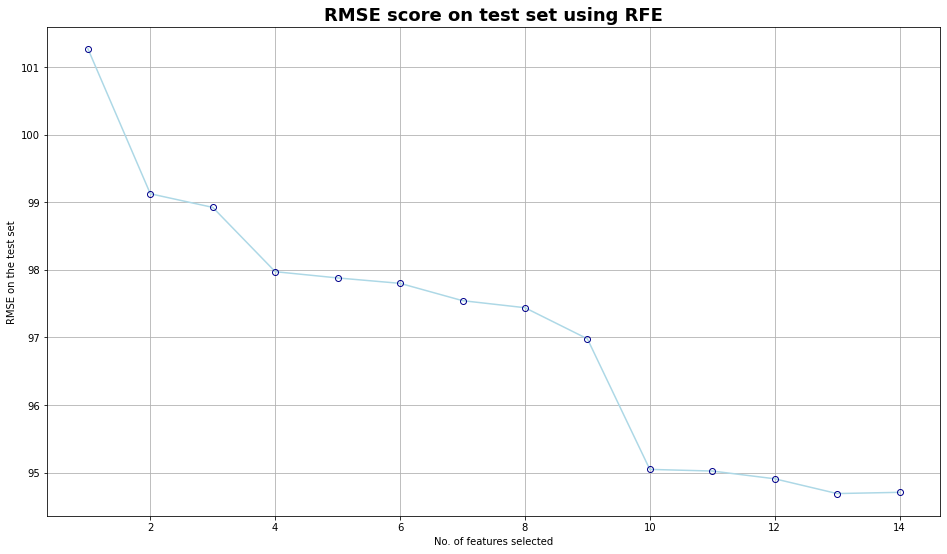

In [15]:
plt.figure(figsize=(16,9))
plt.grid()   
plt.xlabel('No. of features selected')
plt.ylabel('RMSE on the test set')
plt.title('RMSE score on test set using RFE', fontsize=18, fontweight='bold')
plt.plot(range(1, 15), rmse_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'DarkBlue', markerfacecolor = 'None')
plt.show()

We can see that the more the number of features we use, the lower the RMSE score for the test set.

In [16]:
model = LinearRegression()
k = StratifiedKFold(n_splits=5, random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=k, scoring='neg_mean_squared_error')
rfecv = rfecv.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [17]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 25
Best features : Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T6', 'T7', 'RH_7',
       'T8', 'RH_8', 'T9', 'T_out', 'Windspeed', 'Tdewpoint', 'Weekday',
       'Weekend', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')


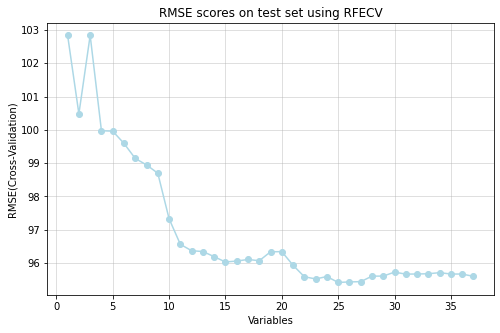

In [18]:
# Plot number of features VS. cross-validation scores RMSE
plt.figure(figsize=(8,5))
plt.xlabel("Variables")
plt.ylabel("RMSE(Cross-Validation)")
plt.title('RMSE scores on test set using RFECV')

rmse_cv_scores = np.sqrt(-rfecv.grid_scores_)

p = plt.plot(range(1, len(rfecv.grid_scores_) + 1), rmse_cv_scores, marker='o', color='lightblue')
plt.grid(alpha=0.5)
plt.show()

Optimal number of features are 25 with a RMSE of around 95-96.